# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
sinasc_1 = sinasc_raw[['munResNome','IDADEMAE', 'IDADEPAI']]
sinasc_munResNome = sinasc_1.dropna().groupby('munResNome')
mediaIdade = sinasc_munResNome.mean().sort_values(by = 'IDADEMAE', ascending=False) 
mediaIdade

,IDADEMAE,IDADEPAI
munResNome,,
Pimenteiras do Oeste,32.600000,35.600000
Cabixi,32.166667,34.333333
Itapuã do Oeste,31.375000,42.500000
Colorado do Oeste,31.161290,34.354839
Cacaulândia,31.000000,36.333333
Vilhena,30.611765,34.152941
Corumbiara,29.000000,32.470588
Jaru,28.450704,32.197183
Cerejeiras,28.361111,31.652778


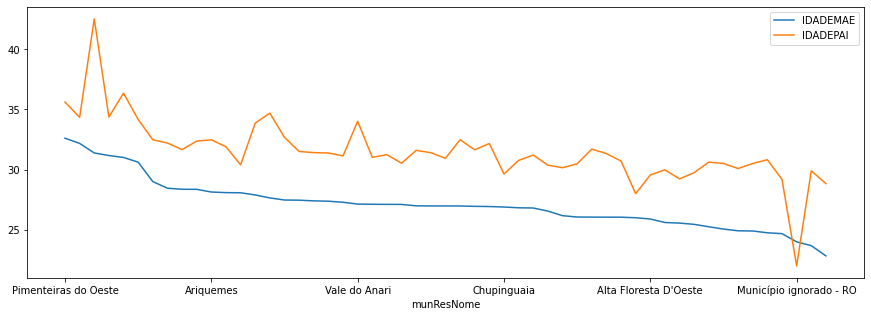

In [5]:
mediaIdade.plot(figsize=[15,5]);

Pode-se observar que os pais apresentam um maior média de idade quando comparado com as médias de idades das mães.
Embora o gráfico não mostre, os 5 municipos com maiores médias de idades dos pais e mães são, respectivamente: Pimenteiras do Oeste, Cabixi, Itapuã do Oeste, Colorado do Oeste e Cacaulândia.



### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [6]:
minha_dataNasc = sinasc_raw[sinasc_raw['DTNASC'] == '2019-05-20']
sinasc_2 = minha_dataNasc[['SEXO','PESO','ESCMAE']]
resposta_2 = sinasc_2.groupby(['ESCMAE','SEXO']).agg(np.mean)
resposta_2


PESO
ESCMAE          SEXO                  
1 a 3 anos      Masculino  3190.000000
12 anos ou mais Feminino   2990.500000
                Masculino  3307.777778
4 a 7 anos      Feminino   3321.285714
                Masculino  3042.272727
8 a 11 anos     Feminino   3191.266667
                Masculino  3209.375000
Nenhuma         Masculino  3645.000000

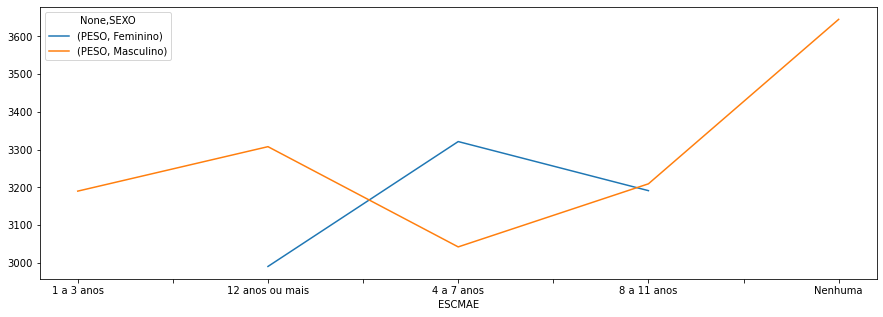

In [7]:
resposta_2.unstack(level = 1).plot(figsize=[15,5]);

O gráfico, gerado que representa o peso médio dos bebes por sexo que nasceram no dia do meu aniversário por faixas de escolaridade mae, mostra que, considreando a nascimento por escolaridade da mãe, não registro de nascimento de bebês do sexo feminino quando observado as esolaridade de 1 a 3 anos e Nenhuma. Ainda para o sexo os bebês do sexo feminino, a média de peso ao nascer concentrou-se na faixa de escolaridade de de 4 a 7 anos. O bebês do sexo masculino apresentaram distribuição em todas as faixas de escolaridade, notando-se que houveram picos de média de peso para filhos de mães sem nenhuma esolaridade e acima de 8 anos de de estudo.

Ressalta-se que a média do peso esta estritamente relacionado ao quantitaivo de bebés nascidos no dia 20 de maio de 2019, assim o que temos é um corte de uma data específica. Abaixo está o quantitativo de nascidos por faixa de escolaridade da mãe.

In [8]:
resposta_2_quanti = sinasc_2.groupby(['ESCMAE','SEXO']).count().unstack()
resposta_2_quanti.fillna(0)

PESO          
SEXO            Feminino Masculino
ESCMAE                            
1 a 3 anos           0.0       1.0
12 anos ou mais     10.0       9.0
4 a 7 anos           7.0      11.0
8 a 11 anos         30.0      16.0
Nenhuma              0.0       1.0

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [9]:
sinasc_1['munResNome'].value_counts().sort_values().head(5)

Município ignorado - RO     1
Castanheiras               32
Pimenteiras do Oeste       40
Primavera de Rondônia      43
Parecis                    44
Name: munResNome, dtype: int64

O municipio que nasceu menos bebê em 2019 foi Castanheirs, com 32 nascimentos. Há um regisro de municipio ignorado, que deve pode ser explicado por erro no registro do mesmo

In [10]:
sinasc_1[sinasc_1['munResNome']=='Castanheiras'].isna().sum()

munResNome    0
IDADEMAE      0
IDADEPAI      4
dtype: int64

Observamos que no munício de Castanheiras há 4 registro que não posseum a idade do pai

In [14]:
sinasc1_mae = sinasc_1.loc[sinasc_1['munResNome'] == 'Castanheiras', ['munResNome', 'IDADEMAE']]
sinasc1_mae.groupby('munResNome').agg({('Maior Idade', max), ('Menor Idade', min), ('Idade Média', np.mean)})

IDADEMAE                        
             Menor Idade Maior Idade Idade Média
munResNome                                      
Castanheiras          17          39    27.28125

In [15]:
sinasc1_pai = sinasc_1.loc[sinasc_1['munResNome'] == 'Castanheiras', ['munResNome', 'IDADEPAI']]
sinasc1_pai.groupby('munResNome').agg({('Maior Idade', max), ('Menor Idade', min), ('Idade Média', np.mean)})

IDADEPAI                        
             Menor Idade Maior Idade Idade Média
munResNome                                      
Castanheiras        17.0        43.0   30.392857

No município de Castanheiras as mães possuem faixa de idade de 17 a 39 anos, com uma média de 27,28 anos. Enquanto que os pais, possuem idades entre 17 a 43 anos, com média de 30,39 anos.

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [16]:
#qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
sinasc_4 = sinasc_raw.copy()
sinasc_4 = sinasc_4[['DTNASC','munResNome','QTDFILVIVO','IDADEPAI']]
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4 = sinasc_4[sinasc_4['DTNASC'].dt.month == 3]
sinasc_4['munResNome'].value_counts().sort_values(ascending=False).head(5)

Porto Velho    744
Ji-Paraná      188
Vilhena        148
Ariquemes      141
Cacoal         133
Name: munResNome, dtype: int64

In [17]:
sinascPV = sinasc_4[sinasc_4['munResNome'] == 'Porto Velho']
sinascPV = sinascPV.dropna()
sinascPV[['munResNome','QTDFILVIVO']].groupby('munResNome').agg({('Média', np.mean), ('Máximo', max), ('Mínimo', min)})

QTDFILVIVO                 
                Máximo Mínimo     Média
munResNome                             
Porto Velho        6.0    0.0  1.479167

**Em Porto Velho houveram 744 registros de bebês vivos no mês de março, sendo que o número máximo de nascimento por dia foi de 6 bebês e uma média de 1,47 bebês nascidos

In [18]:
#qual a idade media, maxima, minima dos pais nesse municipio?
sinascPV[['munResNome','IDADEPAI']].groupby('munResNome').agg({('Média', np.mean), ('Máximo', max), ('Mínimo', min)})

IDADEPAI              
              Máximo Mínimo  Média
munResNome                        
Porto Velho     62.0   19.0  35.75

** A média de idade dos pais de bebês nascido no mês de março em Porto velho foi de 35,75 anos, sendo a menor idade 19 e maior idade 62.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [12]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [128]:
sinasc_Novo = sinasc_raw.select_dtypes(exclude=['int64','float64'])
sinasc_Novo.dtypes

ESCMAE          object
GESTACAO        object
GRAVIDEZ        object
PARTO           object
DTNASC          object
SEXO            object
RACACOR         object
DTCADASTRO      object
CODANOMAL       object
VERSAOSIST      object
DTRECEBIM       object
munResStatus    object
munResTipo      object
munResNome      object
munResUf        object
dtype: object

In [129]:
sinasc_Novo.columns

Index(['ESCMAE', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'DTNASC', 'SEXO', 'RACACOR',
       'DTCADASTRO', 'CODANOMAL', 'VERSAOSIST', 'DTRECEBIM', 'munResStatus',
       'munResTipo', 'munResNome', 'munResUf'],
      dtype='object')

In [130]:
num_parto = sinasc_Novo['PARTO'].count()
num_parto

26979

In [131]:
sinasc_Novo['PARTO'].value_counts()

Cesáreo    18036
Vaginal     8943
Name: PARTO, dtype: int64

In [139]:
num_ces = sinasc_Novo[sinasc_Novo['PARTO']=='Cesáreo'].groupby('PARTO')['PARTO'].count()
num_ces

PARTO
Cesáreo    18036
Name: PARTO, dtype: int64

In [136]:
num_vag = sinasc_Novo[sinasc_Novo['PARTO']=='Vaginal'].groupby('PARTO')['PARTO'].count()
num_vag

,PARTO
PARTO,
Vaginal,8943


In [140]:
incidencia_ces = (num_ces/num_parto)*100
incidencia_ces

PARTO
Cesáreo    66.851996
Name: PARTO, dtype: float64

*Considerando os dados relativos aos registros de Partos, pode-se observar que o número total de Partos no ano de 2019 foi 26.979, desses 18.036 fora Partos Cesarianos. A OMD preconiza que a inciência de parto cesáreo em relação ao número total de partos realizdos em um serviço de saúde seja de 15%, quando mâe e bebê não estão em condições físicas e de saúde para um parto normal/vaginal. No entanto em 2019 o Estado de Rondônia teve uma indicência de 66,85% de partos cesarianos, ou seja 4,45 vezes maior do que o preconizado pela OMS

In [120]:
cesareo = sinasc_Novo[sinasc_Novo['PARTO']=='Cesáreo'].groupby('munResNome')['PARTO'].count().sort_values(ascending=False).head(5).to_frame()
cesareo

,PARTO
munResNome,
Porto Velho,4702
Ji-Paraná,1384
Vilhena,1199
Ariquemes,1176
Cacoal,1113


**O cinco municípios com maior número de parto cesariano são: Porto Velho, Ji-Paraná, Vilhena, Ariquemes, Cocoal

In [121]:
vaginal = sinasc_Novo[sinasc_Novo['PARTO']=='Vaginal'].groupby('munResNome')['PARTO'].count().sort_values(ascending=False).head(5).to_frame()
vaginal

,PARTO
munResNome,
Porto Velho,3710
Ji-Paraná,793
Ariquemes,553
Guajará-Mirim,478
Vilhena,391


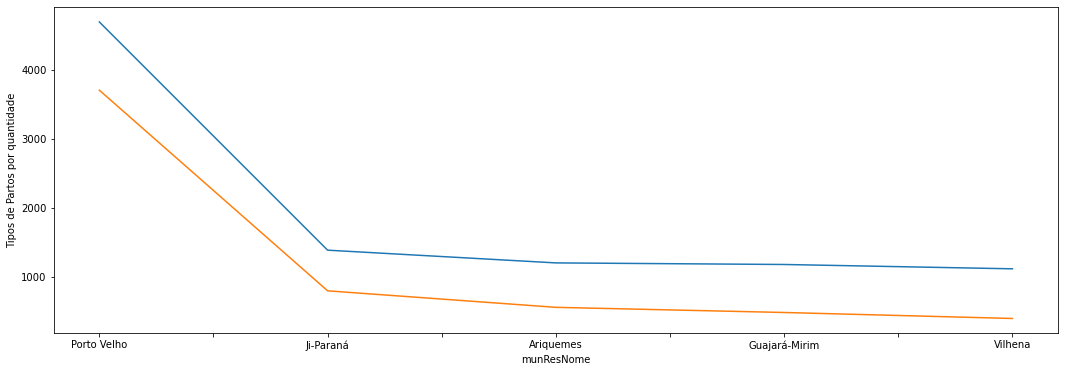

In [119]:
cesareo.plot(figsize=[18,6])
vaginal.plot()
plt.ylabel('Tipos de Partos por quantidade');

**Observa-se, com excessão do municipio de Vilhena, que todos os 5 primeiros municipios apresenta uma incidência de parto cesariano acima do que é preconizado pela OMS. O que leva a uma necessidade de investigar o porquê dessa situação.